# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [5]:
pip install scikit-image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.9 MB 12.2 MB/s eta 0:00:01
   --------------- ------------------------ 5.0/12.9 MB 12.6 MB/s eta 0:00:01
   ------------------------ --------------- 7.9/12.9 MB 12.5 MB/s eta 0:00:01
   -------------------------------- ------- 10.5/12.9 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 12.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 11.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

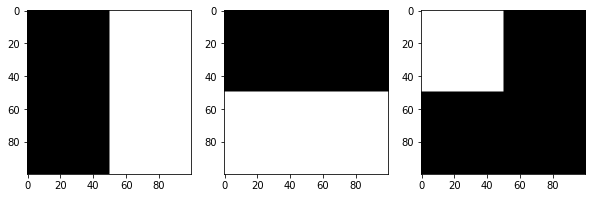

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


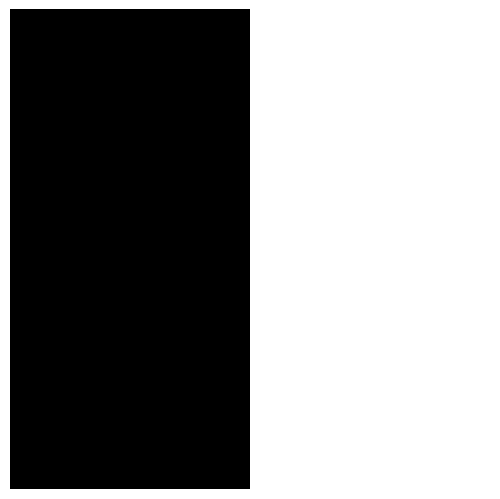

In [20]:
# solution
image_1 = np.zeros((100, 100), dtype=np.uint8)

image_1[0:100, 50:100] = 1 

plt.imshow(image_1, cmap='grey')
plt.axis('off')  # Hide the axis
plt.show()

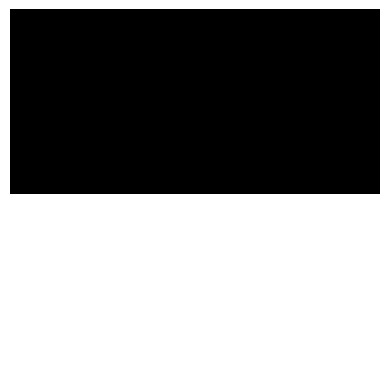

In [15]:
# solution
image_2 = np.zeros((100, 100), dtype=np.uint8)

image_2[50:100, 0:100] = 1 

plt.imshow(image_2, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

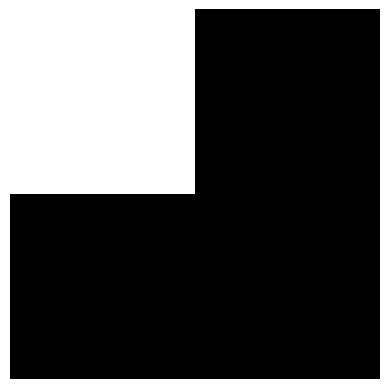

In [17]:
# solution
image_3 = np.zeros((100, 100), dtype=np.uint8)

image_3[0:50, 0:50] = 1 

plt.imshow(image_3, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

*   Use the above three images to create the following image

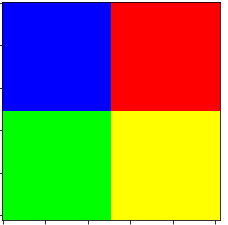
*Hint: Remember channels and color spaces*

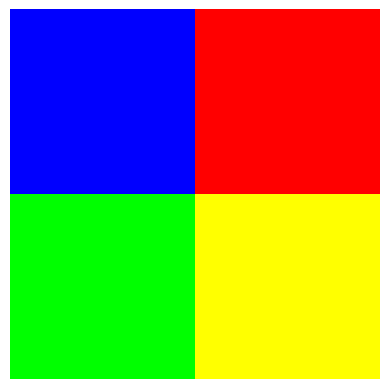

In [23]:
# solution
image_4 = np.zeros((100, 100, 3), dtype=np.uint8)

image_4[0:50, 50:100, 0] = 255 #red

image_4[50:100, 0:50, 1] = 255 #green

image_4[0:50, 0:50, 2] = 255 #blue

image_4[50:100, 50:100, 0] = 255 #yellow
image_4[50:100, 50:100, 1] = 255 #blue
image_4[50:100, 50:100, 2] = 0 #blue

plt.imshow(image_4, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()



### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

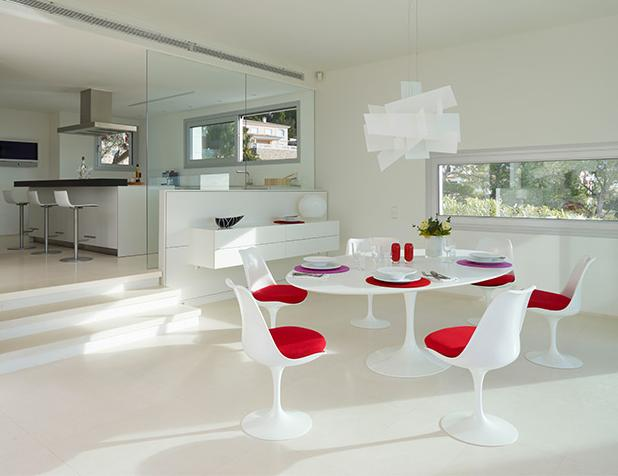

*   Extract individual channels and plot them using matplotlib subplot.



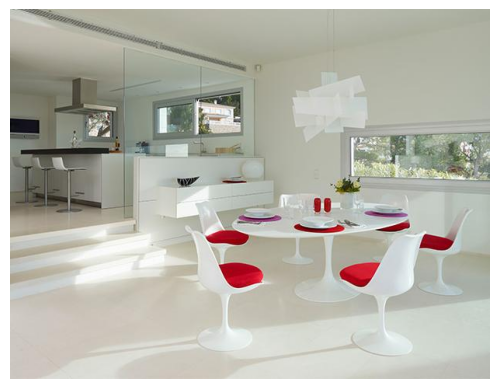

In [31]:
# solution
from skimage import io

image = io.imread('./images/sillas.jpg')


plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

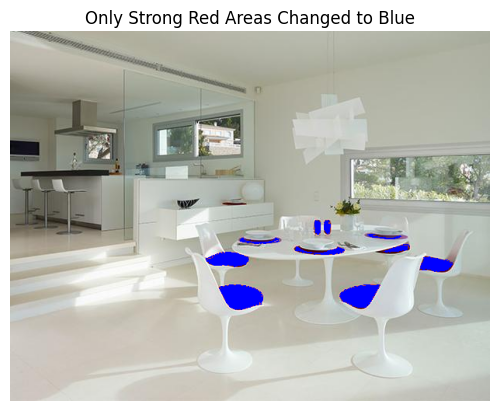

In [59]:
# solution
image = io.imread('./images/sillas.jpg')

red_channel = image[..., 0]   # Red channel
green_channel = image[..., 1] # Green channel
blue_channel = image[..., 2]  # Blue channel

# Create a mask where red is strongly dominant (red > green + blue) and red is above a high threshold
# Also, ensure green and blue are relatively low (to avoid whites or yellows)
red_strong_mask = (red_channel > 100) & (red_channel > 1.5 * green_channel) & (red_channel > 3 * blue_channel)

# Change only the strong red-dominant pixels to blue by modifying their RGB values
image[red_strong_mask, 0] = 0   # Set red channel to 0
image[red_strong_mask, 1] = 0   # Set green channel to 0
image[red_strong_mask, 2] = 255 # Set blue channel to 255

# Display the modified image
plt.imshow(image)
plt.axis('off')
plt.title('Only Strong Red Areas Changed to Blue')
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

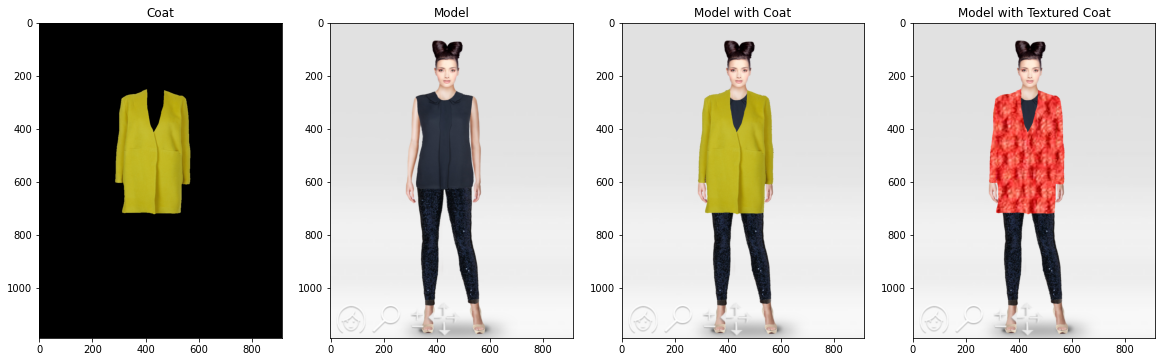

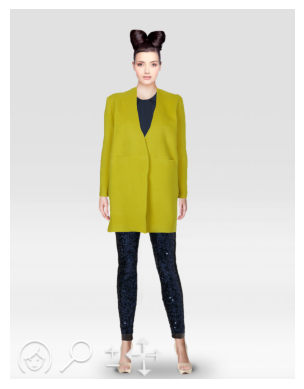

In [72]:
from PIL import Image

# Load two images
background = Image.open('./images/model.png')  # Base image
overlay = Image.open('./images/coat.png')  # Image to overlay

# Ensure the images are the same size (resize overlay to match background)
overlay = overlay.resize(background.size)

# Convert images to RGBA (to handle transparency)
background = background.convert("RGBA")
overlay = overlay.convert("RGBA")

# Separate the RGB channels
r, g, b, a = overlay.split()

# Create NumPy arrays from each channel
r_np = np.array(r)
g_np = np.array(g)
b_np = np.array(b)

# Create a mask where "black" pixels are those with very low R, G, and B values
threshold = 50  # Adjust this to fine-tune what is considered "black"
black_mask = (r_np < threshold) & (g_np < threshold) & (b_np < threshold)

# Create a new alpha channel where black pixels are fully transparent (alpha = 0)
# and non-black pixels are fully opaque (alpha = 255)
alpha_channel = np.where(black_mask, 0, 255).astype(np.uint8)

# Combine the RGB channels and the new alpha channel into an RGBA image
overlay_np = np.dstack((r_np, g_np, b_np, alpha_channel))

# Convert the NumPy array back to a PIL image
overlay_with_alpha = Image.fromarray(overlay_np)

# Composite the images using alpha compositing
composite = Image.alpha_composite(background, overlay_with_alpha)

# Display the composite image using matplotlib
plt.imshow(composite)
plt.axis('off')  # Hide axis
plt.show()

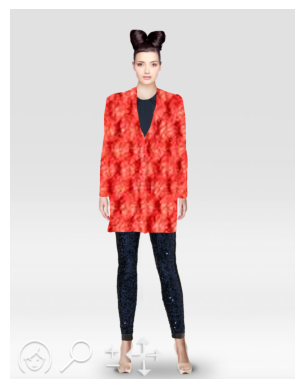

In [74]:
from PIL import Image

# Load two images
background = Image.open('./images/model.png')  # Base image
overlay = Image.open('./images/coat.png')  # Image to overlay
texture = Image.open('./images/texture2.png')  # Texture image


# Ensure the images are the same size (resize overlay to match background)
overlay = overlay.resize(background.size)
texture = texture.resize(background.size)

# Convert images to RGBA (to handle transparency)
background = background.convert("RGBA")
overlay = overlay.convert("RGBA")
texture = texture.convert("RGBA")

# Separate the RGB channels
r, g, b, a = overlay.split()

# Create NumPy arrays from each channel
r_np = np.array(r)
g_np = np.array(g)
b_np = np.array(b)

# Create a mask for the coat by identifying non-black pixels
threshold = 50  # Adjust the threshold to fine-tune what is considered "black"
coat_mask = (r_np > threshold) | (g_np > threshold) | (b_np > threshold)  # Only keep the coat area

# Create a texture-only image using the coat mask
# Convert texture to NumPy array
texture_np = np.array(texture)

# Apply the coat mask to the texture by keeping only the coat area and making everything else transparent
textured_coat = np.zeros_like(texture_np)
textured_coat[coat_mask] = texture_np[coat_mask]  # Apply texture only to coat area

# Convert textured coat back to an image
textured_coat_img = Image.fromarray(textured_coat)

# Composite the textured coat onto the background
final_image = Image.alpha_composite(background, textured_coat_img)

# Display the final image with the coat textured
plt.imshow(final_image)
plt.axis('off')  # Hide axis
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




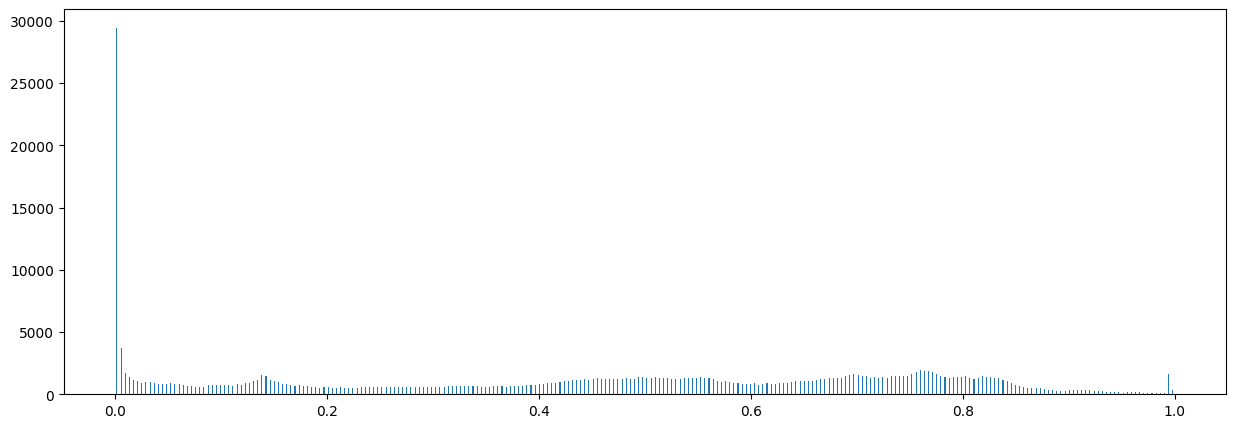

In [95]:
image = data.astronaut()
image = color.rgb2gray(image)

hist, bin_centers = exposure.histogram(image)

plt.figure(figsize=(15, 5))
plt.bar(bin_centers, hist, width=0.001)
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

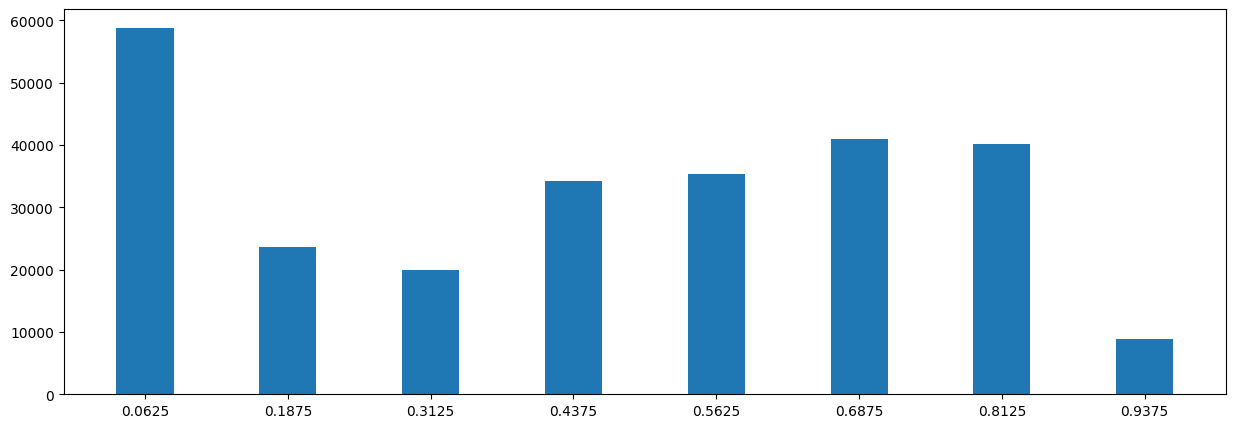

In [100]:
# solution

hist, bin_centers = exposure.histogram(image, nbins=8)

plt.figure(figsize=(15, 5))
plt.bar(bin_centers, hist, width=0.05, tick_label=bin_centers)
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

1. Yes, the inference changes. Because when the nbins was 8, the curve was more flatter and more details can be inferred from the histogram with nbins as 256.
2. If there are too many bins, then the data distribution will look rough and it will be difficult to discern the signal from the noise. If there are two fews bins, the histogram will lack the details needed to discern any useful pattern from the data.

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


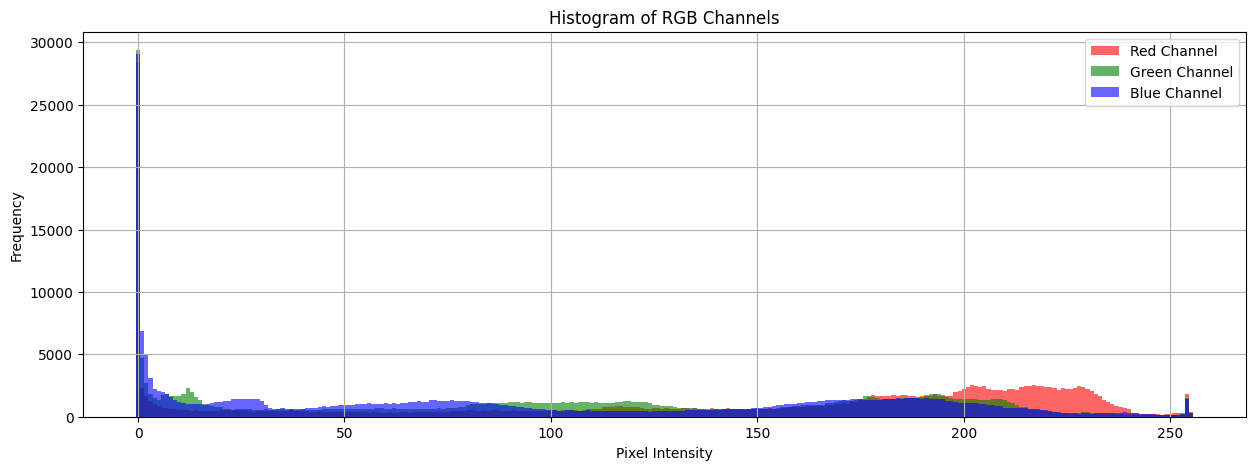

In [105]:
#solution
# Extract the RGB channels
red_channel = image[..., 0]   # Red channel
green_channel = image[..., 1] # Green channel
blue_channel = image[..., 2]  # Blue channel

# Compute histograms for each channel
hist_r, bin_centers_r = exposure.histogram(red_channel)
hist_g, bin_centers_g = exposure.histogram(green_channel)
hist_b, bin_centers_b = exposure.histogram(blue_channel)


# Plot the histograms for each channel
plt.figure(figsize=(15, 5))
plt.bar(bin_centers_r, hist_r, width=1, color='red', alpha=0.6, label='Red Channel')
plt.bar(bin_centers_g, hist_g, width=1, color='green', alpha=0.6, label='Green Channel')
plt.bar(bin_centers_b, hist_b, width=1, color='blue', alpha=0.6, label='Blue Channel')

# Add labels and legend
plt.title('Histogram of RGB Channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)

# Display the plot
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



c:\Users\dusan\AppData\Local\Programs\Python\Python312\Lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


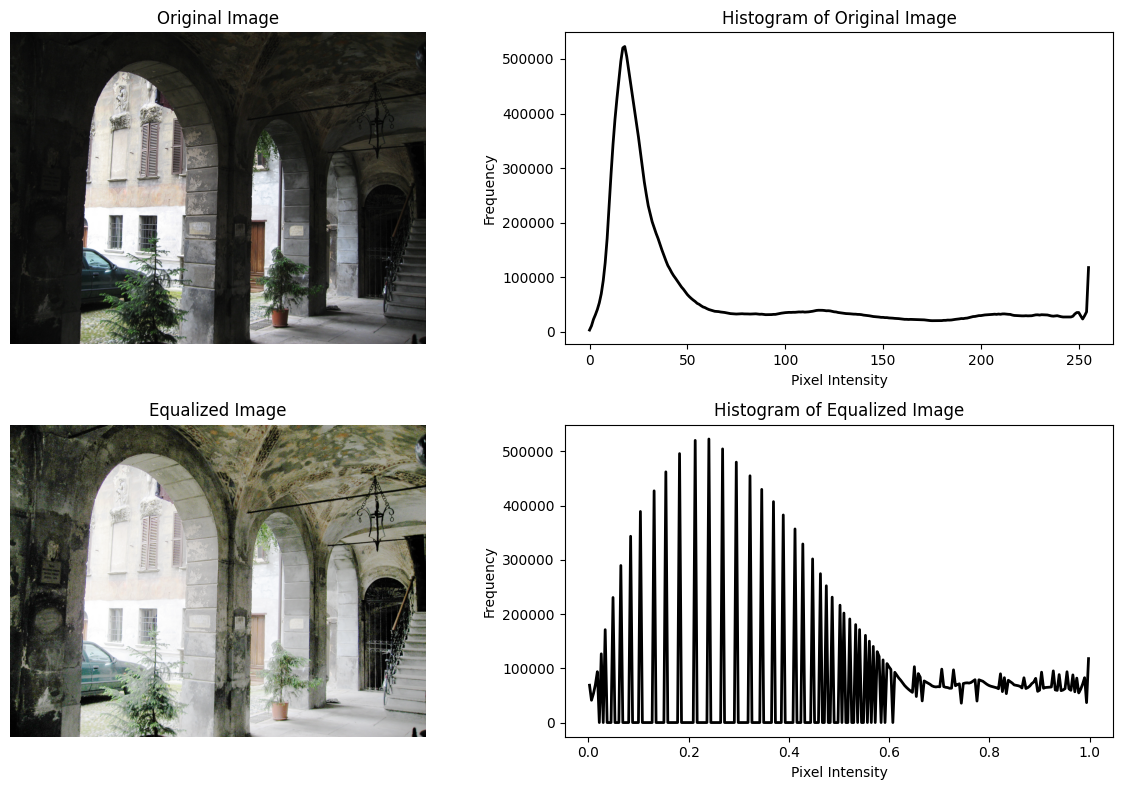

In [106]:
# solution

image = io.imread("./images/aquatermi_lowcontrast.jpg")


# Step 2: Compute the histogram of the original image
hist_orig, bin_centers_orig = exposure.histogram(image)

# Step 3: Perform histogram equalization to enhance the contrast
equalized_image = exposure.equalize_hist(image)

# Step 4: Compute the histogram of the equalized image
hist_eq, bin_centers_eq = exposure.histogram(equalized_image)

# Step 5: Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Plot the histogram of the original image
axes[0, 1].plot(bin_centers_orig, hist_orig, lw=2, color='black')
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Plot the equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title('Equalized Image')
axes[1, 0].axis('off')

# Plot the histogram of the equalized image
axes[1, 1].plot(bin_centers_eq, hist_eq, lw=2, color='black')
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the results
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

Histogram equalization (CDF-based) changes the distribution of pixel intensities in a non-linear way, aiming to improve contrast by spreading intensity values more evenly. It's best for images with uneven or narrow intensity distributions

Linear contrast stretching adjusts pixel values in a linear fashion based on the minimum and maximum intensity values. It's a simpler method that works well when you want to proportionally stretch the image’s contrast across the available range without changing the relative brightness between pixels.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



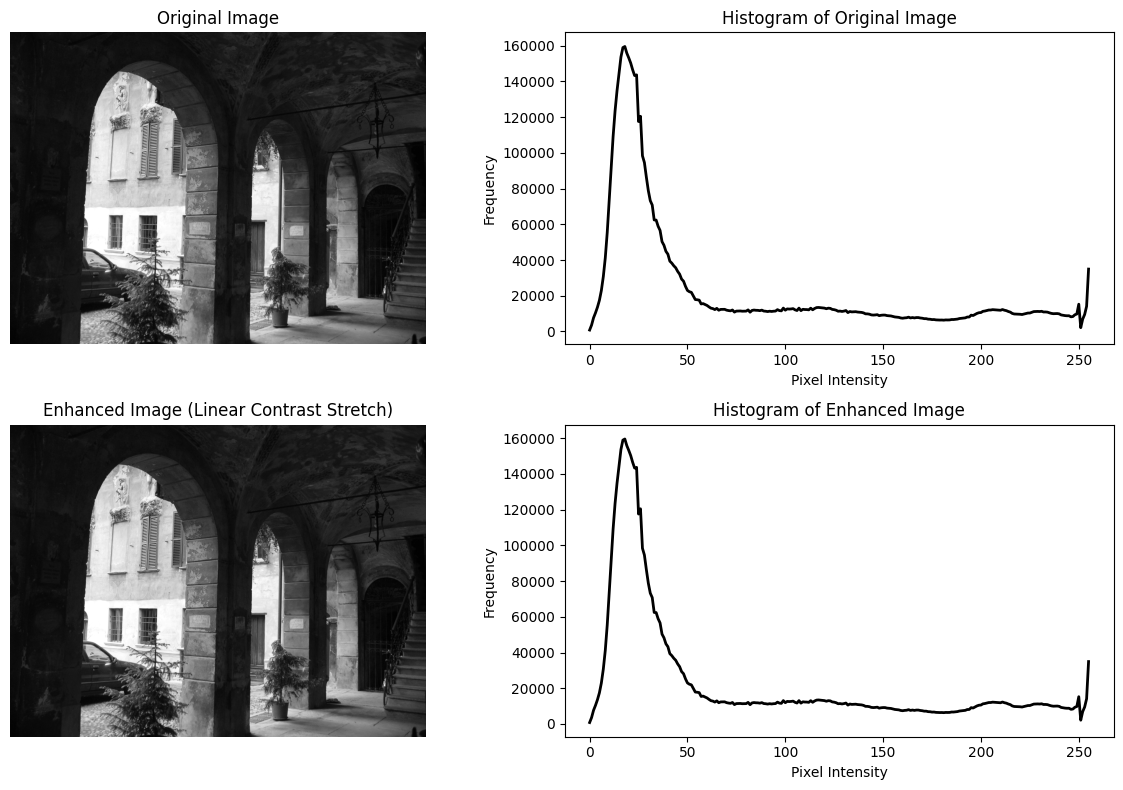

In [109]:
# solution

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure

# Step 1: Define the function to perform linear contrast stretching
def linear_contrast_stretch(image, bins=256):
    # Find minimum and maximum pixel values in the image
    min_val = np.min(image)
    max_val = np.max(image)

    # Apply the linear contrast stretch formula
    stretched_image = (image - min_val) / (max_val - min_val) * 255

    # Convert the stretched image to uint8 (8-bit grayscale image)
    stretched_image = stretched_image.astype(np.uint8)

    return stretched_image

# Step 2: Load the grayscale image
image = io.imread('./images/aquatermi_lowcontrast.jpg', as_gray=True)

# Convert image to a 0-255 scale if necessary (skimage returns float images scaled from 0-1 by default)
image = (image * 255).astype(np.uint8)

# Define the number of bins for the histogram
bins = 256  # You can modify this value as needed

# Step 3: Apply linear contrast stretch to the image
enhanced_image = linear_contrast_stretch(image, bins)

# Step 4: Compute histograms for both the original and enhanced images
hist_orig, bin_centers_orig = exposure.histogram(image, nbins=bins)
hist_enhanced, bin_centers_enhanced = exposure.histogram(enhanced_image, nbins=bins)

# Step 5: Create a 2x2 plot to visualize the original image, its histogram, the enhanced image, and its histogram
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Original grayscale image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Plot 2: Histogram of original image
axes[0, 1].plot(bin_centers_orig, hist_orig, lw=2, color='black')
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Enhanced image after linear contrast stretch
axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].set_title('Enhanced Image (Linear Contrast Stretch)')
axes[1, 0].axis('off')

# Plot 4: Histogram of enhanced image
axes[1, 1].plot(bin_centers_enhanced, hist_enhanced, lw=2, color='black')
axes[1, 1].set_title('Histogram of Enhanced Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




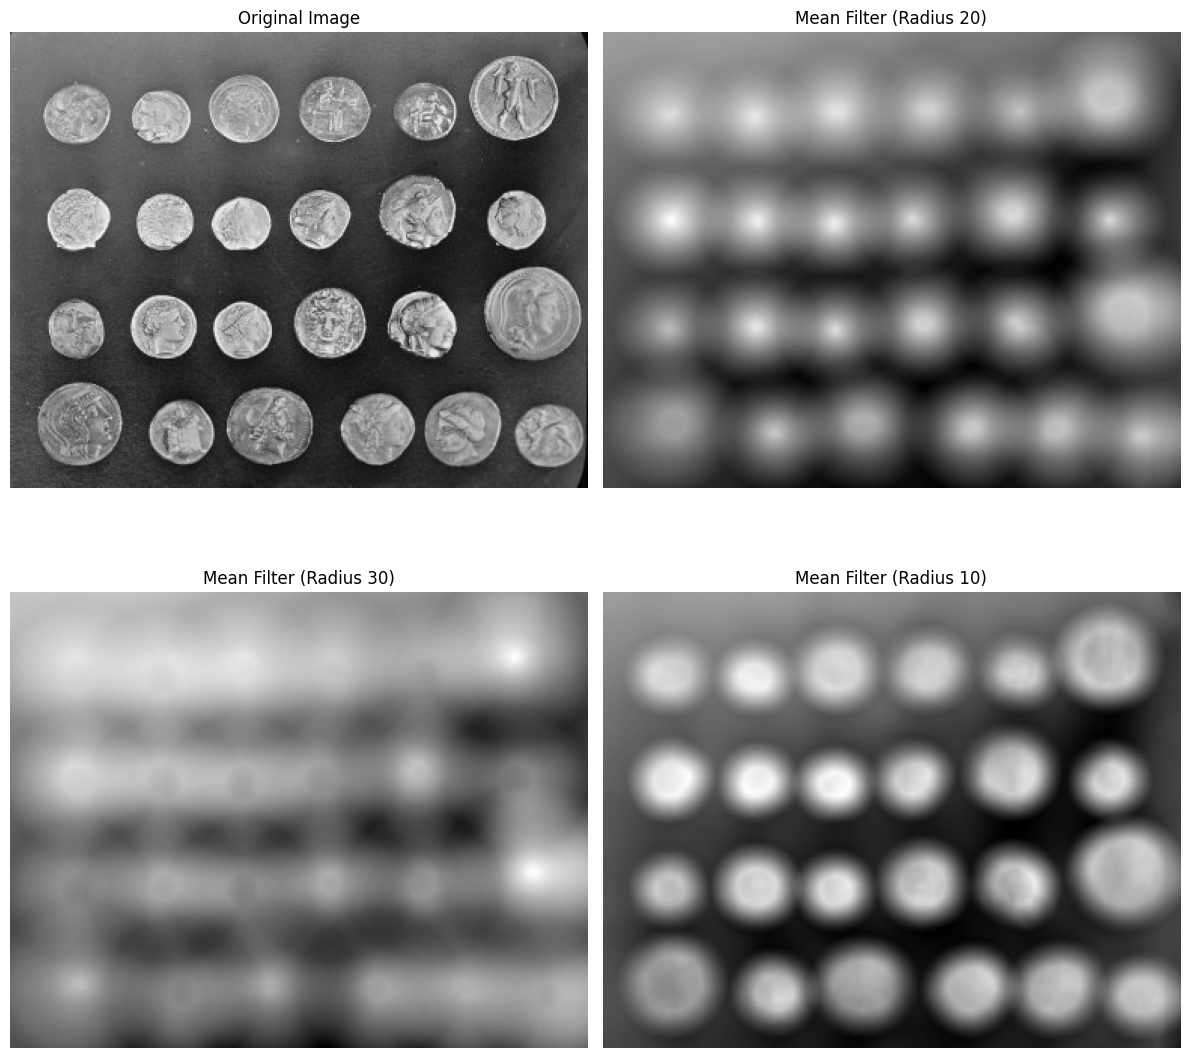

In [111]:
import matplotlib.pyplot as plt
from skimage import data, filters, morphology
from skimage.filters import rank
from skimage.util import img_as_ubyte

# Step 1: Load the 'coins' image
coins_image = data.coins()

# Convert the image to 8-bit grayscale if necessary (rank filters require 8-bit images)
coins_image = img_as_ubyte(coins_image)

# Step 2: Define a disk structuring element (selem) of radius 20
selem_20 = morphology.disk(20)

# Step 3: Apply the mean filter using the structuring element of radius 20
mean_filtered_20 = rank.mean(coins_image, selem_20)

# Step 4: Increase the radius of the structuring element by 10 (radius = 30)
selem_30 = morphology.disk(30)
mean_filtered_30 = rank.mean(coins_image, selem_30)

# Step 5: Reduce the radius of the structuring element by 10 (radius = 10)
selem_10 = morphology.disk(10)
mean_filtered_10 = rank.mean(coins_image, selem_10)

# Step 6: Create a 2x2 plot to visualize the original image and the smoothened images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the original image
axes[0, 0].imshow(coins_image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Plot the image filtered with selem of radius 20
axes[0, 1].imshow(mean_filtered_20, cmap='gray')
axes[0, 1].set_title('Mean Filter (Radius 20)')
axes[0, 1].axis('off')

# Plot the image filtered with selem of radius 30
axes[1, 0].imshow(mean_filtered_30, cmap='gray')
axes[1, 0].set_title('Mean Filter (Radius 30)')
axes[1, 0].axis('off')

# Plot the image filtered with selem of radius 10
axes[1, 1].imshow(mean_filtered_10, cmap='gray')
axes[1, 1].set_title('Mean Filter (Radius 10)')
axes[1, 1].axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

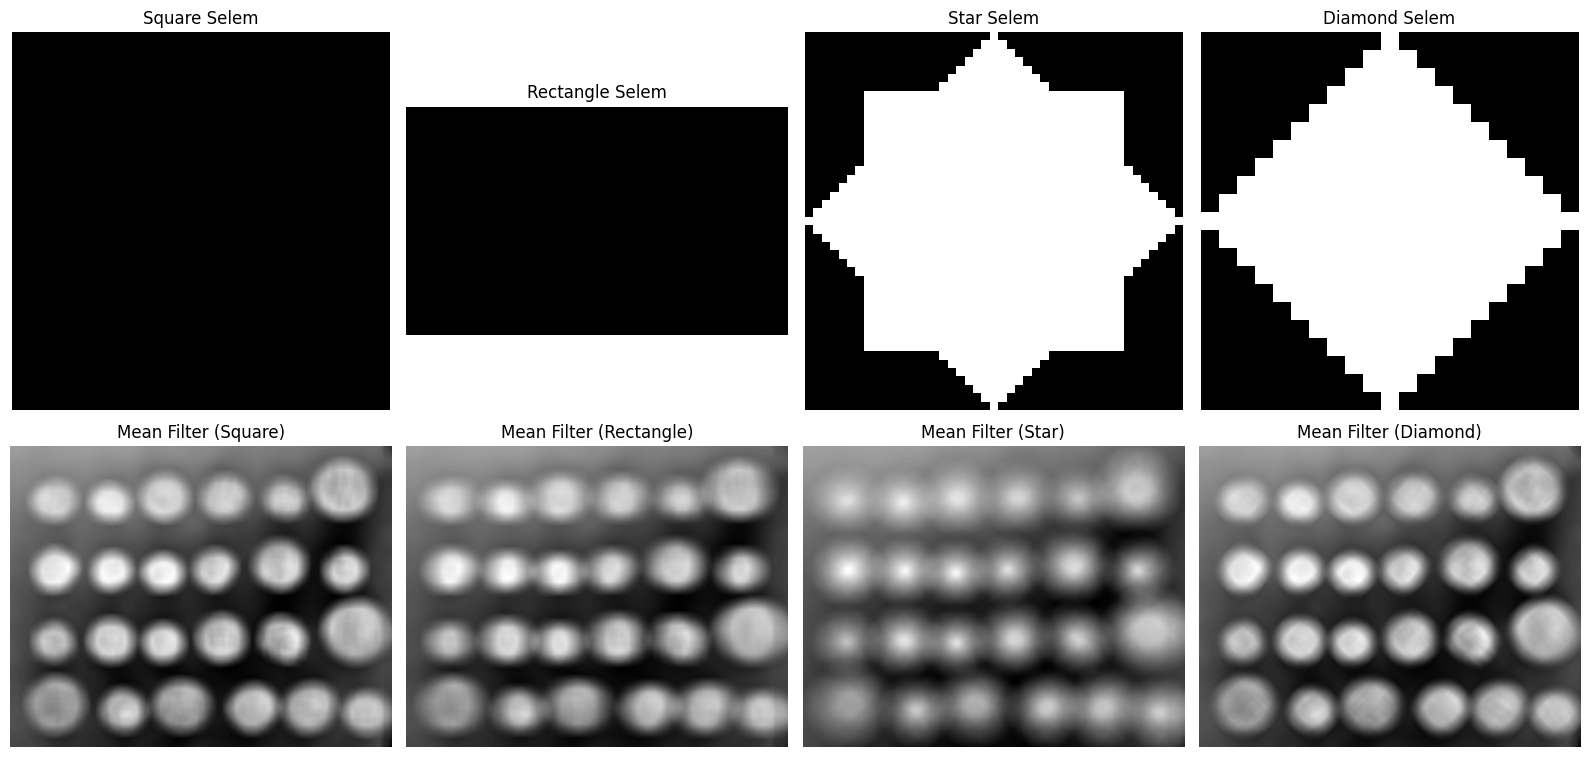

In [112]:
# solution

import matplotlib.pyplot as plt
from skimage import data, morphology
from skimage.filters import rank
from skimage.util import img_as_ubyte

# Step 1: Load the 'coins' image
coins_image = data.coins()

# Convert the image to 8-bit grayscale (rank filters require 8-bit images)
coins_image = img_as_ubyte(coins_image)

# Step 2: Define different structuring elements (square, rectangle, star, diamond)
selem_square = morphology.square(15)     # Square selem
selem_rectangle = morphology.rectangle(15, 25)  # Rectangle selem
selem_star = morphology.star(15)         # Star selem
selem_diamond = morphology.diamond(10)   # Diamond selem

# Step 3: Apply the mean filter using each structuring element
mean_filtered_square = rank.mean(coins_image, selem_square)
mean_filtered_rectangle = rank.mean(coins_image, selem_rectangle)
mean_filtered_star = rank.mean(coins_image, selem_star)
mean_filtered_diamond = rank.mean(coins_image, selem_diamond)

# Step 4: Create a 2x4 plot to visualize the structuring elements and the corresponding smoothened images
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# First row: Display the structuring elements (as images)
axes[0, 0].imshow(selem_square, cmap='gray')
axes[0, 0].set_title('Square Selem')
axes[0, 0].axis('off')

axes[0, 1].imshow(selem_rectangle, cmap='gray')
axes[0, 1].set_title('Rectangle Selem')
axes[0, 1].axis('off')

axes[0, 2].imshow(selem_star, cmap='gray')
axes[0, 2].set_title('Star Selem')
axes[0, 2].axis('off')

axes[0, 3].imshow(selem_diamond, cmap='gray')
axes[0, 3].set_title('Diamond Selem')
axes[0, 3].axis('off')

# Second row: Display the smoothened images after applying the mean filter
axes[1, 0].imshow(mean_filtered_square, cmap='gray')
axes[1, 0].set_title('Mean Filter (Square)')
axes[1, 0].axis('off')

axes[1, 1].imshow(mean_filtered_rectangle, cmap='gray')
axes[1, 1].set_title('Mean Filter (Rectangle)')
axes[1, 1].axis('off')

axes[1, 2].imshow(mean_filtered_star, cmap='gray')
axes[1, 2].set_title('Mean Filter (Star)')
axes[1, 2].axis('off')

axes[1, 3].imshow(mean_filtered_diamond, cmap='gray')
axes[1, 3].set_title('Mean Filter (Diamond)')
axes[1, 3].axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Larger disk radius:

Smooths the image more aggressively, leading to significant blurring.
Reduces noise, but also removes fine details.
Best for removing large-scale noise or variations.



Smaller disk radius:

Less aggressive smoothing, preserving more of the image's details.
Maintains local contrast and sharpness, while still reducing noise on a small scal

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Uniformity:

Shapes like square and rectangle apply more uniform smoothing across their defined area, which can lead to a more homogeneous smoothing effect but may cause significant loss of fine details and features.
Star and diamond shapes apply more localized or directional smoothing, which is less aggressive and better at preserving fine details, especially along edges.


Directional Bias:

A rectangular structuring element with different aspect ratios can introduce directional bias in the smoothing, either horizontally or vertically, which can be useful for specific tasks (e.g., streaks or noise reduction in a particular direction).
Diamond and star structuring elements are more sensitive to diagonal or radial features and apply less distortion than rectangles or squares.


Preservation of Fine Details:

Diamond and star structuring elements tend to preserve finer details better than squares and rectangles, as their shapes conform better to curved or non-linear features in the image.
Square and rectangle shapes smooth more aggressively, which can blur fine features, especially at edges and corners.

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**
1. Mean Filter (Also known as Box Filter or Average Filter):


How it works:
The mean filter computes the average of all the pixel values in a neighborhood around a target pixel and replaces the target pixel with this average value.
It uses a uniform weight for all pixels in the neighborhood. All pixels within the filter window contribute equally to the average.

Smoothing Behavior:
The mean filter smooths the image by replacing each pixel with the mean of its neighbors. However, because it gives equal importance to all pixels in the neighborhood, it can cause blurring of edges and fine details.

Effect on Image:
The mean filter reduces noise by averaging out rapid intensity changes (such as noise spikes), but it also blurs edges because it does not take into account the relative importance of neighboring pixels.
Sharp changes in intensity (e.g., edges) are often smoothed out, which results in loss of detail and contrast.

Type of Filter:
The mean filter is a non-weighted, linear filter, meaning it applies the same weight (or importance) to all neighboring pixels when averaging.


2. Gaussian Filter:

How it works:

The Gaussian filter uses a Gaussian function (bell-shaped curve) to weight the pixels in the neighborhood of the target pixel. Pixels closer to the target pixel are given higher weights, while pixels farther away have lower weights.
This creates a smoothing effect where neighboring pixels contribute to the output, but in a way that gradually decreases in influence with distance from the center.


Smoothing Behavior:

The Gaussian filter provides a smoother and more natural form of blurring compared to the mean filter because the weights follow a Gaussian distribution. This means nearby pixels contribute more to the final value, preserving some image details while reducing noise.
Effect on Image:

The Gaussian filter is better at preserving edges compared to the mean filter because it gives higher importance to closer pixels (which are likely to belong to the same region as the target pixel) and lower importance to farther ones.
While it still causes some blurring, it tends to be gentler on edges and fine details, making it more effective for natural-looking smoothing.


Type of Filter:

The Gaussian filter is a weighted, linear filter, where the weights follow the shape of a Gaussian distribution. This allows for more selective smoothing based on the spatial proximity of pixels.













...

# When to Use Mean Filter vs Gaussian Filter?

## Mean Filter:

### When to use:

Basic noise reduction: It can be used when you need simple noise reduction and the preservation of details or edges isn't critical.
Preprocessing step: It is often used as a quick and simple preprocessing step for tasks like edge detection, where blurring before applying an edge detector like Sobel or Canny helps reduce noise.
Real-time or low-power applications: Since the mean filter is computationally simpler and faster, it can be preferred for real-time applications or devices with limited processing power.

### When to avoid:

When you need to preserve fine details or edges in the image, the mean filter may not be ideal because it blurs edges and fine structures.

## Gaussian Filter:
### When to use:

Noise reduction with edge preservation: If you need to reduce noise but also want to preserve the edges and fine details of the image, the Gaussian filter is a better choice.
Smoother blurring: Gaussian filters are commonly used in computer vision and image processing tasks that require natural-looking blurring without heavily distorting the original image.
Preprocessing for advanced algorithms: Gaussian smoothing is often used before applying algorithms like object detection, segmentation, or feature extraction, where retaining fine details is important.

### When to avoid:

If you need very basic noise reduction or low-computation filtering, Gaussian filters may be overkill, and a simpler filter like the mean filter could suffice.